In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve)

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

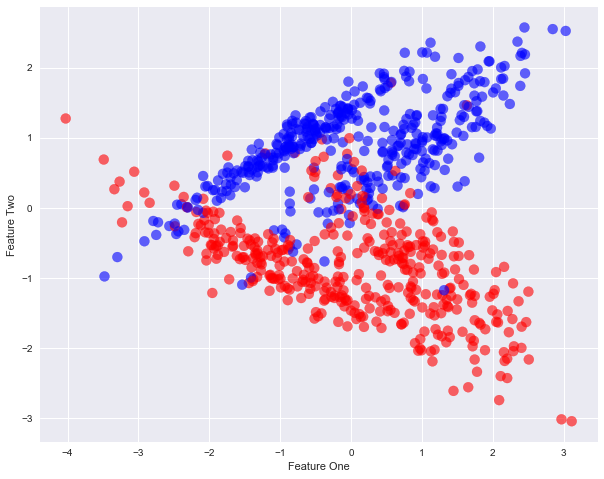

In [9]:
data = make_classification(n_samples=800,
                          n_features=2,
                          class_sep=.89,
                          n_informative=2,
                          n_redundant=0,
                          n_repeated=0,
                          n_classes=2,
                          random_state=42)

df = pd.DataFrame(data[0], columns=['feature_one', 'feature_two'])
df['target'] = data[1]

# Assign red to a class 0 and blue to class 1 (for plotting purposes)
colors = df['target'].map({0: 'red', 1: 'blue'})

df.plot(x='feature_one', y='feature_two', kind='scatter', c=colors, s=100, alpha=0.6, figsize=(10,8))
plt.xlabel('Feature One')
plt.ylabel('Feature Two')

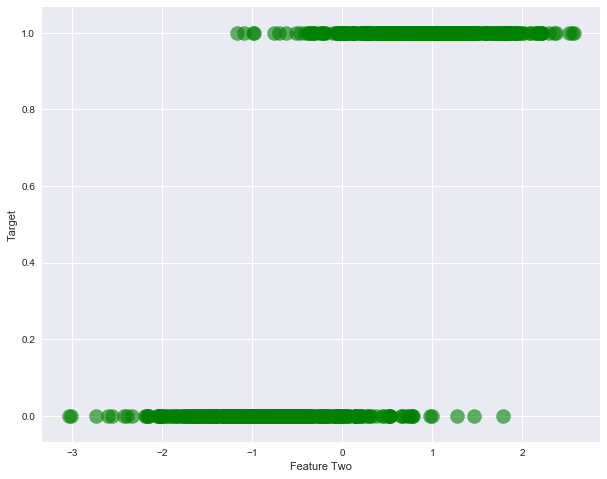

In [10]:
df.plot(x='feature_two', y='target', s=200, alpha=0.6, figsize=(10,8), kind='scatter', c='green')
plt.xlabel('Feature Two')
plt.ylabel('Target')

In [13]:
# Assign X and y
features = ['feature_two']
target = 'target'

X = df[features]
y = df[target]

In [14]:
# Initialize the logistic regression model
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
score = lr.score(X,y)
print "The accuracy score is {:.1f}%.".format(score*100)

The accuracy score is 90.2%.


In [18]:
lr.predict(X)

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0,

In [19]:
labels = lr.predict(X)

In [20]:
probs = lr.predict_proba(X)[:,1]

In [24]:
preds = pd.DataFrame({'labels': labels, 'probs': probs})
preds = pd.concat([X, y, preds], axis=1).sort_values('feature_two')
preds.head()

,feature_two,target,labels,probs
739,-3.039890,0,0,0.000046
44,-3.012610,0,0,0.000051
711,-2.739166,0,0,0.000122
152,-2.607692,0,0,0.000187
68,-2.555669,0,0,0.000221


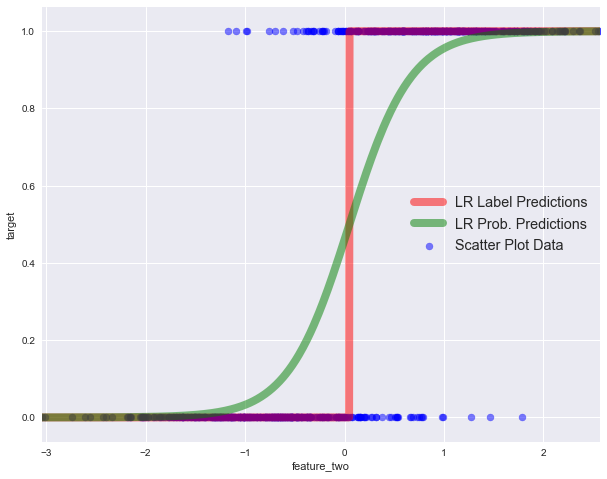

In [25]:
ax = plt.gca()
plt.xlabel('Feature Two')
plt.ylabel('Target')

preds.plot(
    x='feature_two',
    y='target',
    c='blue',
    s=50,
    alpha=0.5,
    label='Scatter Plot Data',
    kind='scatter',
    ax=ax
)

preds.plot(
    x='feature_two',
    y='labels',
    c='red',
    linewidth=8,
    alpha=0.5,
    label='LR Label Predictions',
    kind='line',
    ax=ax
)

preds.plot(
    x='feature_two',
    y='probs',
    c='green',
    linewidth=8,
    alpha=0.5,
    label='LR Prob. Predictions',
    kind='line',
    ax=ax,
    figsize=(10,8)
)

plt.legend(loc="right", fontsize="x-large")

In [26]:
def plot_decision_boundary(model, X, y):
    
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    
    Z = ZZ > 0.5
    Z = Z.reshape(xx.shape)
    
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40, alpha=0.4)
    
    plt.xlabel('Feature One')
    plt.ylabel('Feature Two')

In [27]:
# Create X and y variables from data using df

features = ['feature_one', 'feature_two']
target = 'target'

X = df[features]
y = df[target]

# Color code y
color = y.map({0: "blue", 1: "red"})

In [28]:
# Initialize model and fit it to X and y
lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

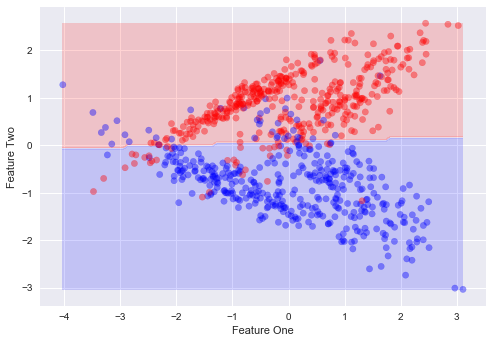

In [29]:
plot_decision_boundary(lr, X.values, color)

In [31]:
print "intercept: ", lr.intercept_
print "coefficients: " , lr.coef_

intercept:  [-0.22298685]
coefficients:  [[-0.11750725  3.25598308]]


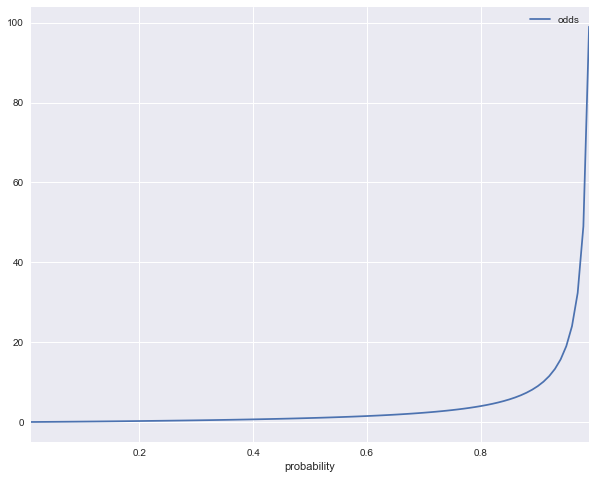

In [33]:
# Create a table of probability vs. odds
table = pd.DataFrame({'probability': np.arange(start=0.01, stop=1.0, step=0.01)})
table['odds'] = table['probability'] / (1 - table['probability'])
table.plot(x='probability', y='odds', kind='line', figsize=(10,8))

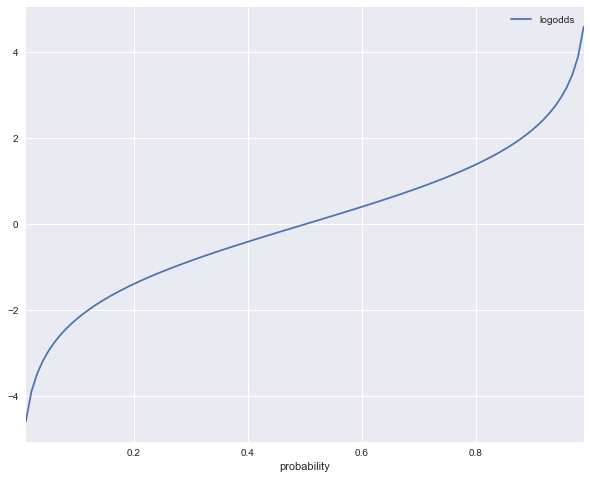

In [34]:
# Add the log odds to the table by taking the **natural log** of the odds
table['logodds'] = np.log(table['odds'])
table.plot(x='probability', y='logodds', kind='line', figsize=(10,8))